In [308]:
import imageio
import math

import numpy as np
import scipy as sp

from PIL import Image
from scipy import fft, ifft, conj
from scipy.fftpack import fftshift

In [330]:
def cross_power(i1, i2):
    f1 = fft(i1)
    f2 = fft(i2)
#     return (f2 * conj(f1)) / abs(f1 * conj(f1)) # faroosh
#     return (f1 * conj(f2)) / abs(f1 * f2) # msft
    return (f1 * conj(f2)) / abs(f1 * conj(f2))

def convolve(im, template, op):
    h_len, w_len = im.shape
    th, tw = template.shape
    offset_h, offset_w = (int(th/2), int(tw/2))
    op_res = np.zeros((h_len, w_len))
    for i in range(h_len-th+1):
        for j in range(w_len-tw+1):
            # slice im to be the area under the template
            op_res[i+offset_h, j+offset_w] = op(im[i:i+th, j:j+tw], template)
    return op_res

In [331]:
import matplotlib.pyplot as plt

def show_registration(ref, mov, correlation, coord):
    fig, (a, b, corr) = plt.subplots(1, 3, figsize=(10, 18))
    
    a.imshow(ref, cmap='gray')
    a.set_title('Reference')
    a.plot(coord[0], coord[1], 'ro')
    
    b.imshow(mov, cmap='gray')
    b.set_title('Moving')
    
    corr.imshow(abs(correlation) ** 2)
    corr.set_title('Cross-correlation')
    plt.show()

In [335]:
s = 1024
newsize = (s,s)
temp1 = Image.open('../data/T1_segment_2.tif').resize(newsize)
temp2 = Image.open('../data/T1_segment_4.tif').resize(newsize)

In [336]:
im1 = np.array(temp1).astype('float64')
# p = int(im1.shape[0])
# im1 = np.pad(im1, ((p,p), (p,p)), 'constant', constant_values=(0,0))
im2 = np.array(temp2).astype('float64')

# cps = convolve(im1, im2, cross_power)
cps = ifft(cross_power(im1, im2))
y,x = np.unravel_index(np.argmax(cps), cps.shape)
x,y

(0, 591)

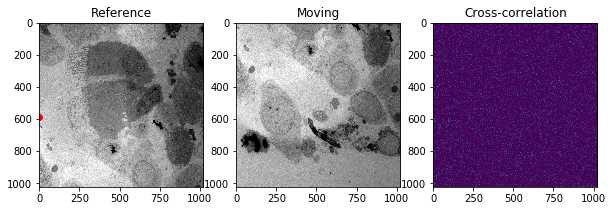

In [337]:
show_registration(im1, im2, cps, (x,y))